In [2]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point
from shapely import wkt
import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline


In [3]:
data = pd.read_csv('crime.csv', encoding='latin-1')
data.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [4]:
#we will change the column names to lower case.
data.columns = [x.lower() for x in data.columns]

In [ ]:
# date column is a object.. so we will convert it to a datetime obj

In [5]:
data['occurred_on_date'] = pd.to_datetime(data['occurred_on_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
incident_number        319073 non-null object
offense_code           319073 non-null int64
offense_code_group     319073 non-null object
offense_description    319073 non-null object
district               317308 non-null object
reporting_area         319073 non-null object
shooting               1019 non-null object
occurred_on_date       319073 non-null datetime64[ns]
year                   319073 non-null int64
month                  319073 non-null int64
day_of_week            319073 non-null object
hour                   319073 non-null int64
ucr_part               318983 non-null object
street                 308202 non-null object
lat                    299074 non-null float64
long                   299074 non-null float64
location               319073 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 41.4+ MB


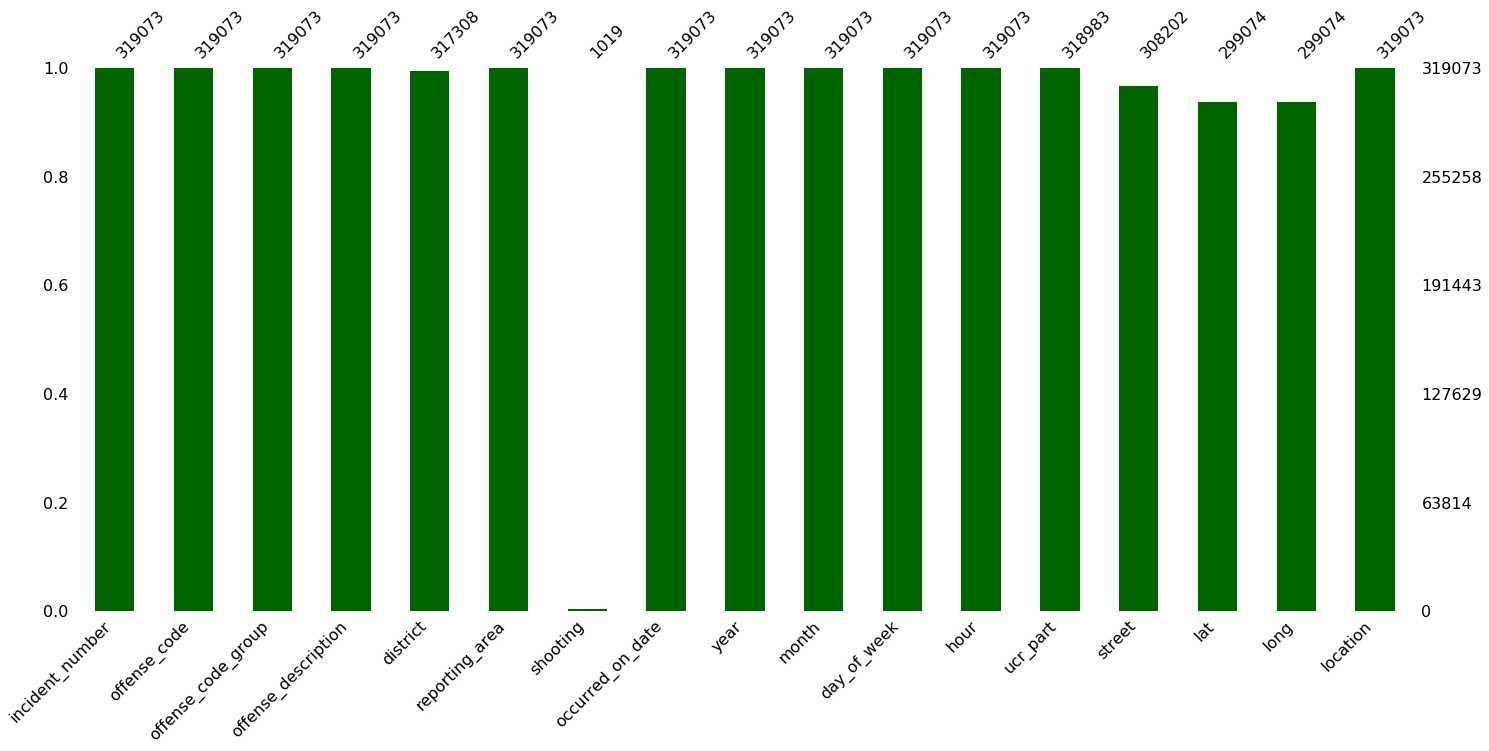

In [48]:
msn.bar(data, color='darkgreen')

In [6]:
# we can see that shooting column has most null values... It is possible that only some of the 
#crimes that were reported involved a firearm.

#At this point, we dont have to worry about the missing data from the Lat, Long columns.


,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"


In [6]:
import datetime
mydate = data['occurred_on_date']
#a = mydate[0]
data['month'] = [month.month_name() for month in mydate]

In [7]:
year_add = data['occurred_on_date']
data['year'] = [year.year for year in year_add]

In [85]:
data.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,September,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,August,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,September,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,September,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,September,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


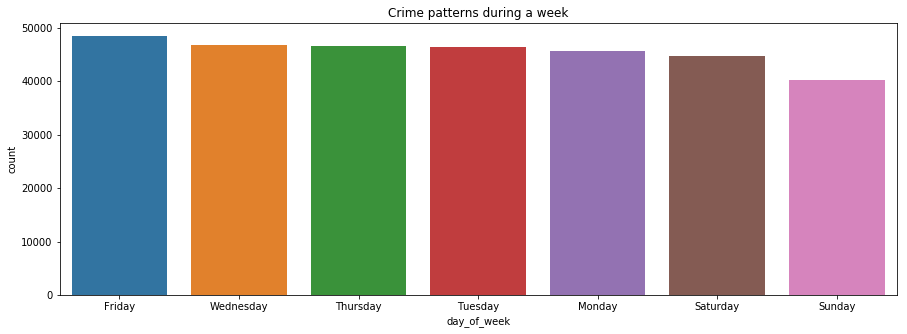

In [8]:
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot('day_of_week', data=data, ax=ax, order=data['day_of_week'].value_counts().index)
plt.title("Crime patterns during a week")
plt.show()

### We can see that the crime rate is high on Fridays.. Let's explore more on what types of crimes are committed on a Friday and we also see when do these crimes occur.

In [459]:
#Types of Crimes
data['offense_code_group'].value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18750
Other                                        18075
Drug Violation                               16548
Simple Assault                               15826
Vandalism                                    15415
Verbal Disputes                              13099
Towed                                        11287
Investigate Property                         11124
Larceny From Motor Vehicle                   10847
Property Lost                                 9751
Warrant Arrests                               8407
Aggravated Assault                            7807
Violations                                    6095
Fraud                                         5829
Residential Burglary                          5606
Missing Person Located                        4958
Auto Theft                     

Text(0,0.5,'Crimes')

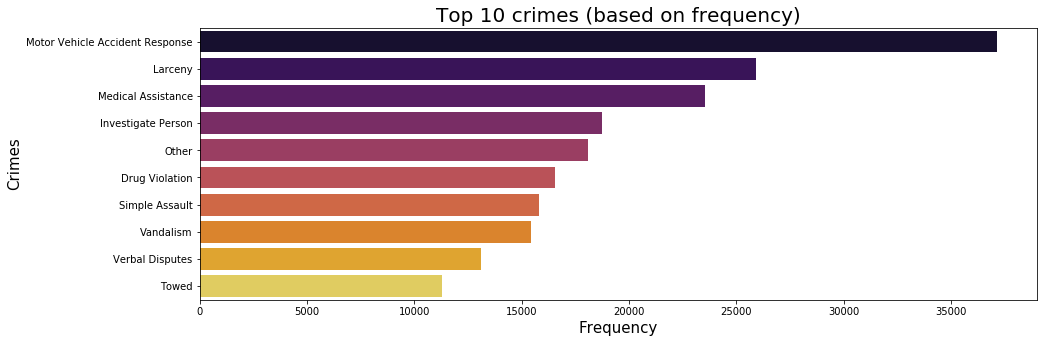

In [17]:
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(y='offense_code_group', data=data, palette = 'inferno', 
              order=data['offense_code_group'].value_counts().head(10).index, ax=ax)
plt.title('Top 10 crimes (based on frequency)', fontsize=20)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Crimes', fontsize=15)


### Top 20 crimes that occur on Friday

In [10]:
friday_data = data[data['day_of_week'] == 'Friday']
friday_data.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
57,I182070872,1402,Vandalism,VANDALISM,C6,205,NaN,2018-08-31 17:00:00,2018,August,Friday,17,Part Two,A ST,42.347543,-71.050662,"(42.34754258, -71.05066210)"
108,I182070817,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,D14,788,NaN,2018-08-31 12:00:00,2018,August,Friday,12,Part Three,SUTHERLAND RD,42.340234,-71.148006,"(42.34023408, -71.14800614)"
122,I182070803,1402,Vandalism,VANDALISM,B3,463,NaN,2018-08-17 12:10:00,2018,August,Friday,12,Part Two,BLUE HILL AVE,42.292165,-71.088970,"(42.29216506, -71.08896989)"
175,I182070746,1402,Vandalism,VANDALISM,C11,462,NaN,2018-08-31 07:00:00,2018,August,Friday,7,Part Two,BULLARD ST,42.302188,-71.073650,"(42.30218780, -71.07365004)"
257,I182070639,3201,Property Lost,PROPERTY - LOST,D14,796,NaN,2018-08-31 22:00:00,2018,August,Friday,22,Part Three,LINDEN ST,42.351792,-71.130240,"(42.35179211, -71.13023989)"


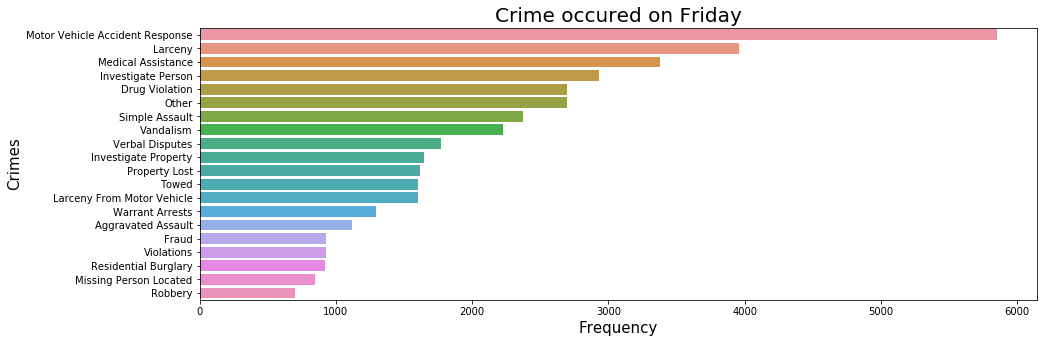

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(y='offense_code_group', data=friday_data, order=friday_data['offense_code_group'].value_counts().head(20).index, ax=ax)
plt.title("Crime occured on Friday", fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Crimes', fontsize=15)
plt.show()

 ### From the top 20 crimes, we can see that 'Motor Vehicle Accident Response' is listed as most occured crime followed by Larceny and 'Medical Assistance'.
 
### Motor Vehicle Accident Response - crimes (M/V invloved) related to accident, fleeing from the scene of the crime, property damage and so on are listed as Motor Vehicle Accidents.

### Medical Assistance Crime - crimes involved in sudden death (death investigation), animal control (dog bite), sucide attempts and so on are listed as Medical Assistance.

Text(0,0.5,'Count')

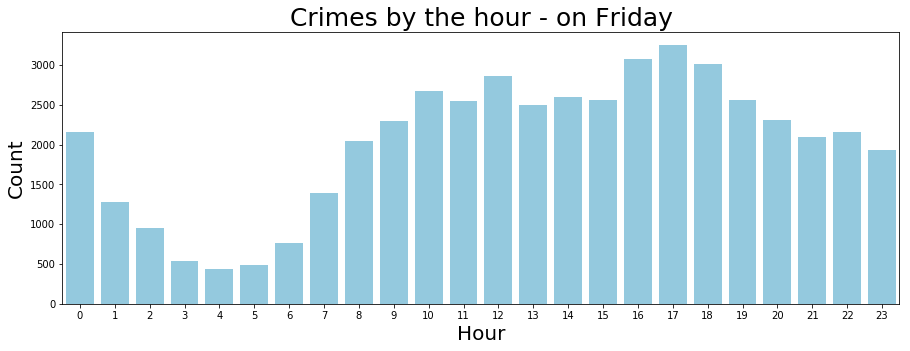

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot('hour', data=friday_data, ax=ax, color='skyblue')
plt.title("Crimes by the hour - on Friday", fontsize=25)
plt.xlabel('Hour', fontsize=20)
plt.ylabel('Count', fontsize=20)

### As we can see that maximum number of crimes are commited between 12 PM - 8 PM.

In [20]:
crimes_between_12_8 = data[(data['hour'] > 12) | (data['hour'] < 20)]

Text(0,0.5,'Crime')

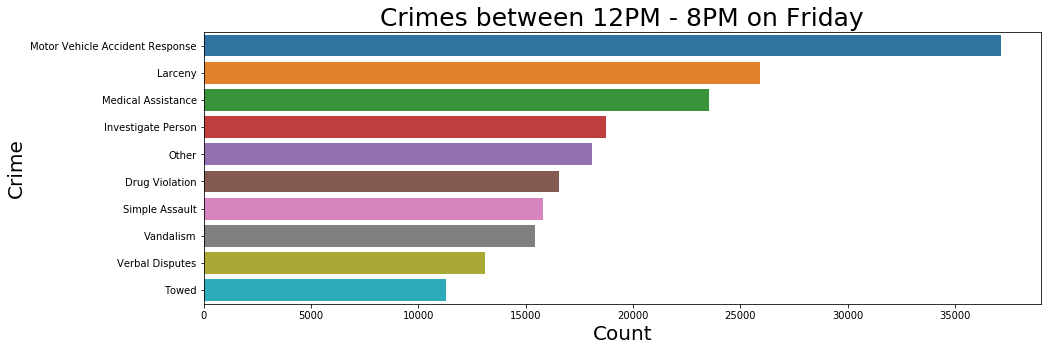

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(y='offense_code_group', data=crimes_between_12_8, order=crimes_between_12_8['offense_code_group'].value_counts().head(10).index, ax=ax)
plt.title("Crimes between 12PM - 8PM on Friday", fontsize=25)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Crime', fontsize=20)

### From the analysis we can determine that 'Motor Vehicle Accident Response', 'Larceny', and 'Medical Assistance' are on top of the list.

### Investigate accident related crimes

In [40]:
accident_data = data[data['offense_code_group'] == 'Motor Vehicle Accident Response']

In [41]:
mv_accident = accident_data[accident_data['offense_code_group'] == 'Motor Vehicle Accident Response']

In [42]:
mv_accident = mv_accident[['offense_description', 'street']]

In [25]:
mv_accident.head()

,offense_description,street
5,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,TALBOT AVE
21,M/V ACCIDENT - OTHER,BEACON ST
23,M/V ACCIDENT - PERSONAL INJURY,WASHINGTON ST
25,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN
44,M/V ACCIDENT - PROPERTY DAMAGE,WASHINGTON ST


In [13]:
mv_accident.head()

,offense_description,street
5,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,TALBOT AVE
21,M/V ACCIDENT - OTHER,BEACON ST
23,M/V ACCIDENT - PERSONAL INJURY,WASHINGTON ST
25,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN
44,M/V ACCIDENT - PROPERTY DAMAGE,WASHINGTON ST


In [142]:
mv_accident.size

74264

In [43]:
mv_accident.reset_index(inplace=True)
mv_accident.drop('index', inplace=True, axis=1)
#mv_accident[mv_accident['offense_description'].str.contains('DEATH')]
mv_accident.head()

,offense_description,street
0,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,TALBOT AVE
1,M/V ACCIDENT - OTHER,BEACON ST
2,M/V ACCIDENT - PERSONAL INJURY,WASHINGTON ST
3,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN
4,M/V ACCIDENT - PROPERTY DAMAGE,WASHINGTON ST


In [145]:
a = mv_accident['offense_description'][3].split('-')

In [146]:
a[1].strip()

'LEAVING SCENE'

In [44]:
mv = mv_accident['offense_description'].to_frame()

In [45]:
acc_list = []
def parse_acc(data):    
    for value in data:
        first_med_split = value.split('-')
        if len(first_med_split) > 1:
            #print("hhh"+str(first_med_split))
            acc_list.append(first_med_split[1].strip())
        else:
            acc_list.append(first_med_split[0].strip())
    
mv.apply(parse_acc)


offense_description    None
dtype: object

In [157]:
len(acc_list)

37132

In [46]:
accident_frame = pd.DataFrame({'offense_description':acc_list})

In [47]:
mv_accident['offense_description'] = accident_frame['offense_description']

In [32]:
mv_accident['offense_description'].value_counts()

LEAVING SCENE           17609
PROPERTY  DAMAGE         6557
PERSONAL INJURY          5131
OTHER                    2925
INJURY                   1656
INVOLVING  BICYCLE        916
POLICE VEHICLE            766
OTHER CITY VEHICLE        732
INVOLVING BICYCLE         426
INVOLVING PEDESTRIAN      414
Name: offense_description, dtype: int64

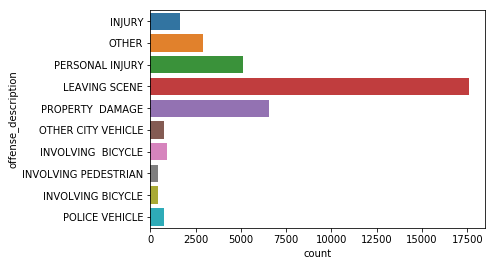

In [48]:
fig, ax = plt.subplots(1)
sns.countplot(y='offense_description', data=accident_frame)

In [34]:
mv_accident['offense_description'].unique()

array(['INJURY', 'OTHER', 'PERSONAL INJURY', 'LEAVING SCENE',
       'PROPERTY \xa0DAMAGE', 'OTHER CITY VEHICLE',
       'INVOLVING \xa0BICYCLE', 'INVOLVING PEDESTRIAN',
       'INVOLVING BICYCLE', 'POLICE VEHICLE'], dtype=object)

In [49]:
mv_accident.head()

,offense_description,street
0,INJURY,TALBOT AVE
1,OTHER,BEACON ST
2,PERSONAL INJURY,WASHINGTON ST
3,LEAVING SCENE,NaN
4,PROPERTY DAMAGE,WASHINGTON ST


In [82]:
data[data['offense_description'].str.contains('LEA')]['offense_description'].unique()

array(['M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'M/V - LEAVING SCENE - PERSONAL INJURY',
       'AUTO THEFT - LEASED/RENTED VEHICLE',
       'PROPERTY - CONCEALING LEASED', 'AUTO THEFT LEASE/RENT VEHICLE'],
      dtype=object)

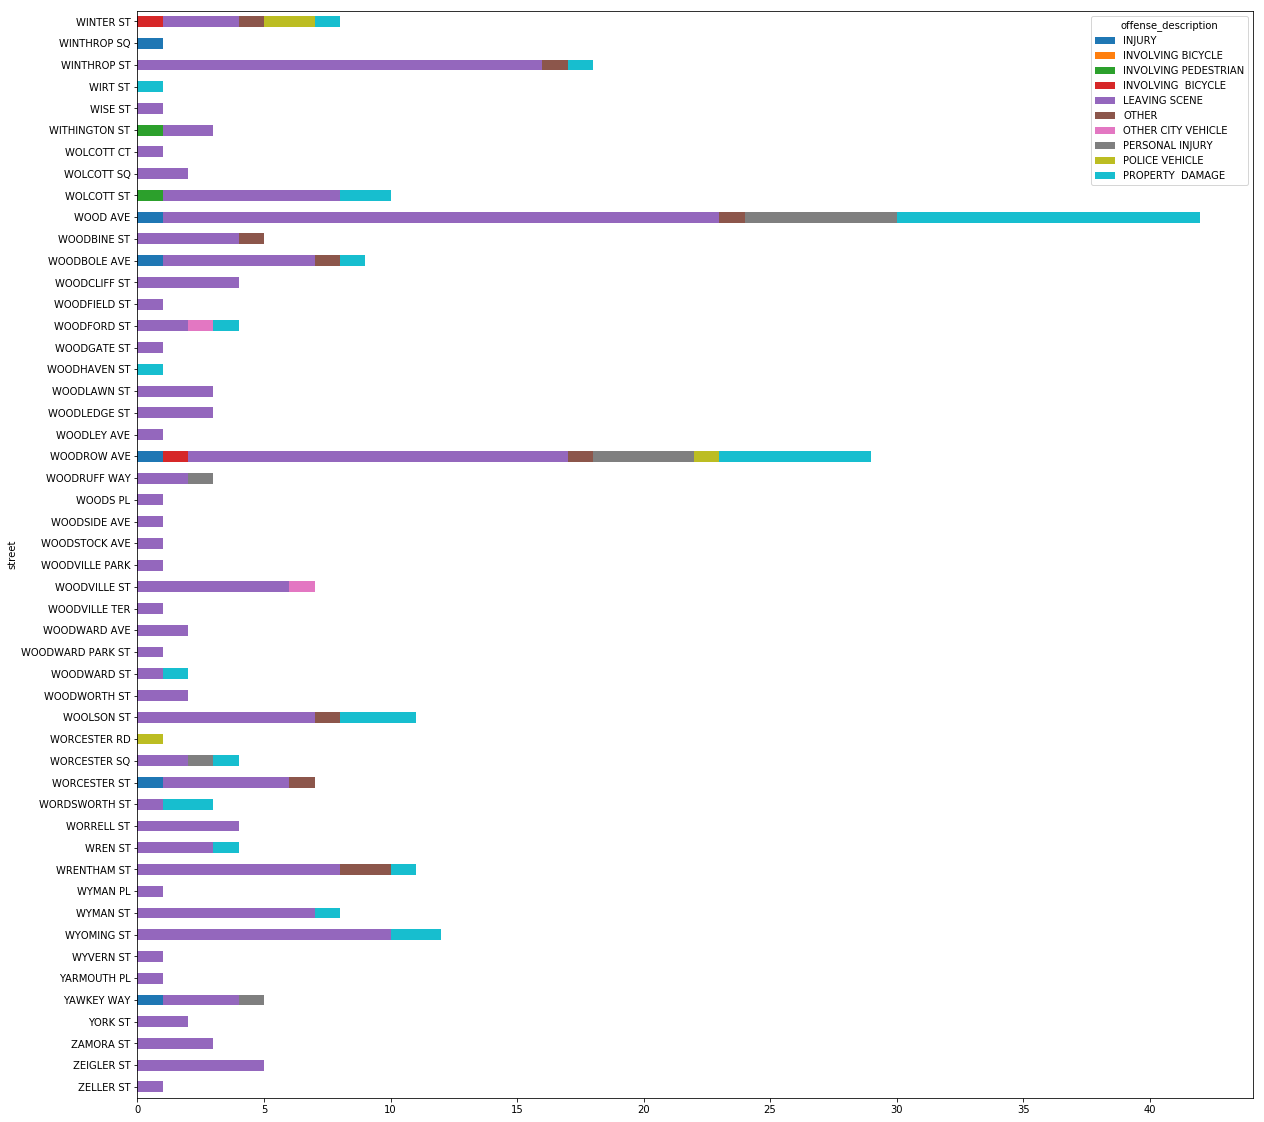

In [50]:
acc_barh = pd.crosstab(mv_accident.street, mv_accident.offense_description)
acc_barh_sorted = acc_barh.sort_values(by='street', ascending=False).head(50)
acc_barh_sorted.plot.barh(stacked=True)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

### Map accidents

In [55]:
map_accidents_personal_injury = data.loc[(data['offense_description'] == 'M/V - LEAVING SCENE - PERSONAL INJURY')]

map_accidents_property_injury = data.loc[(data['offense_description'] == 'M/V - LEAVING SCENE - PROPERTY DAMAGE')]
                

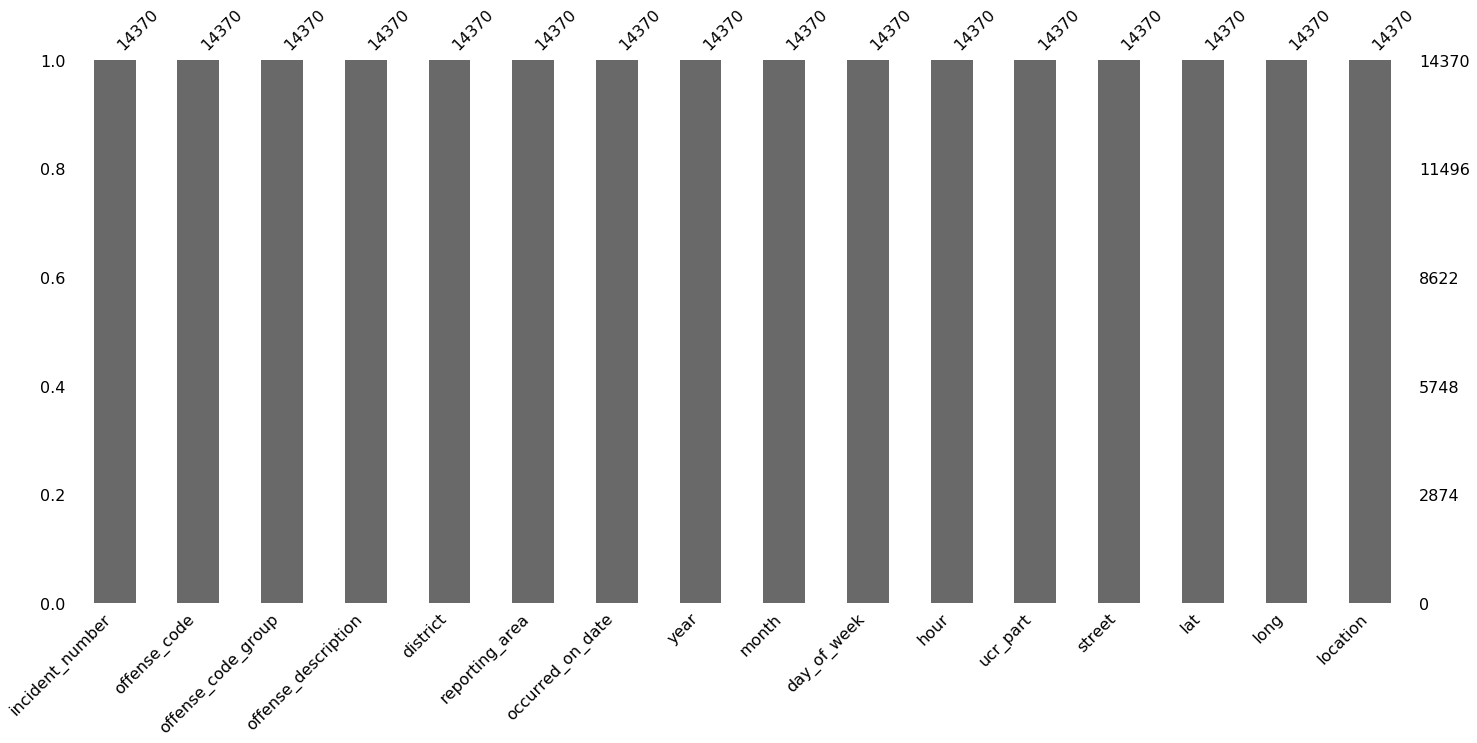

In [140]:
msn.bar(map_accidents_property_injury)

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


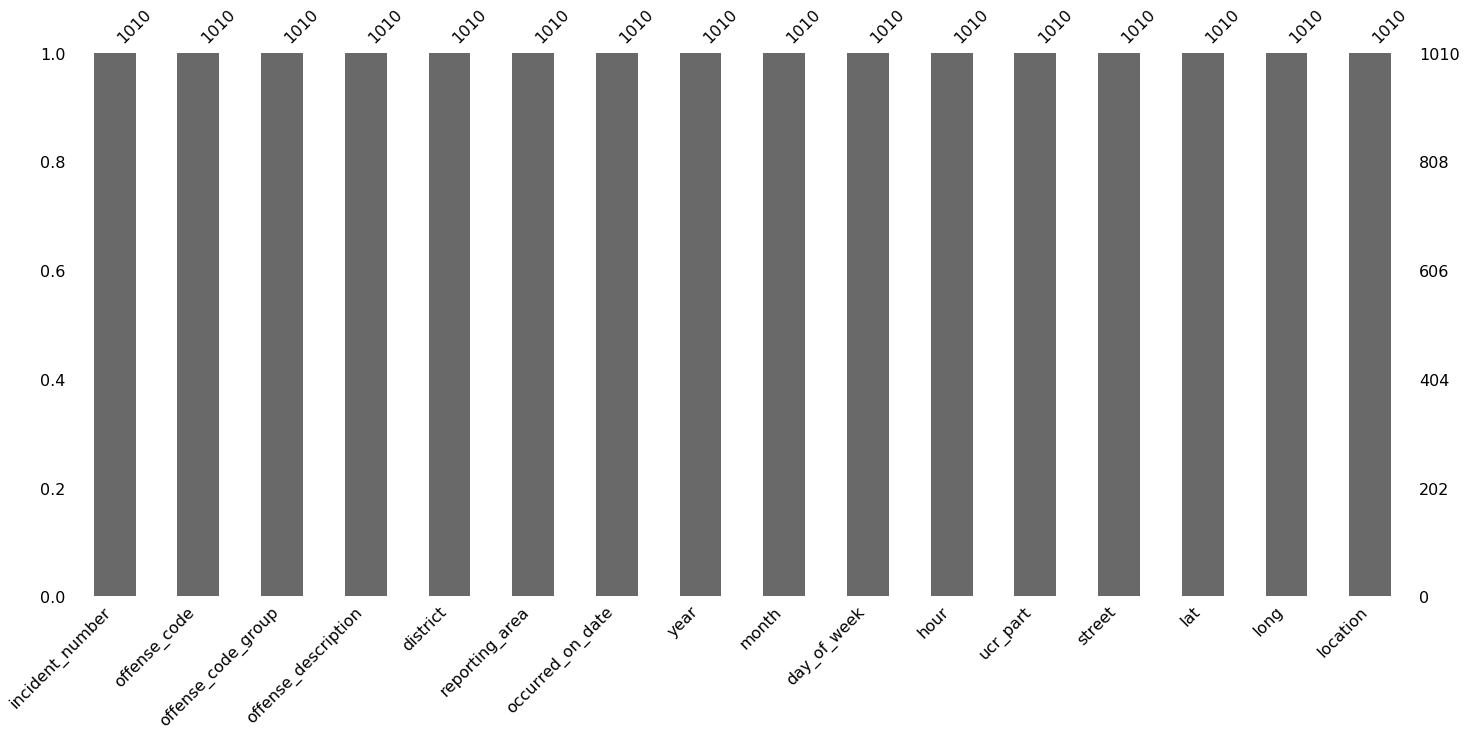

In [56]:
map_accidents_personal_injury.drop('shooting', inplace=True, axis=1)
map_accidents_personal_injury.dropna(inplace=True, axis=0)
msn.bar(map_accidents_personal_injury)

In [57]:
map_accidents_personal_injury['location'] = map_accidents_personal_injury[['long', 'lat']].values.tolist()
map_accidents_personal_injury['location'] = map_accidents_personal_injury.location.apply(Point)
map_accidents_personal_injury.head()

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
138,I182070786,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,A1,95,2018-09-03 11:08:00,2018,September,Monday,11,Part Three,ATLANTIC AVE,42.357875,-71.051329,POINT (-71.051329 42.357875)
1079,I182069744,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,A1,99,2018-08-30 18:45:00,2018,August,Thursday,18,Part Three,CONGRESS ST,42.357584,-71.056401,POINT (-71.05640108 42.35758403)
1431,I182069349,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,A7,26,2018-08-29 14:41:00,2018,August,Wednesday,14,Part Three,MERIDIAN ST,42.375538,-71.039104,POINT (-71.03910405000001 42.37553782)
1872,I182068860,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,B2,300,2018-08-27 21:19:00,2018,August,Monday,21,Part Three,MARCELLA ST,42.321628,-71.094602,POINT (-71.09460242999999 42.32162821)
1944,I182068780,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,A1,65,2018-08-26 15:00:00,2018,August,Sunday,15,Part Three,BLOSSOM ST,42.361697,-71.066859,POINT (-71.06685878 42.3616972)


In [59]:
accident_geo_personal = geopandas.GeoDataFrame(map_accidents_personal_injury, geometry='location')
accident_geo_personal.head(2)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
138,I182070786,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,A1,95,2018-09-03 11:08:00,2018,September,Monday,11,Part Three,ATLANTIC AVE,42.357875,-71.051329,POINT (-71.051329 42.357875)
1079,I182069744,3830,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PERSONAL INJURY,A1,99,2018-08-30 18:45:00,2018,August,Thursday,18,Part Three,CONGRESS ST,42.357584,-71.056401,POINT (-71.05640108 42.35758403)


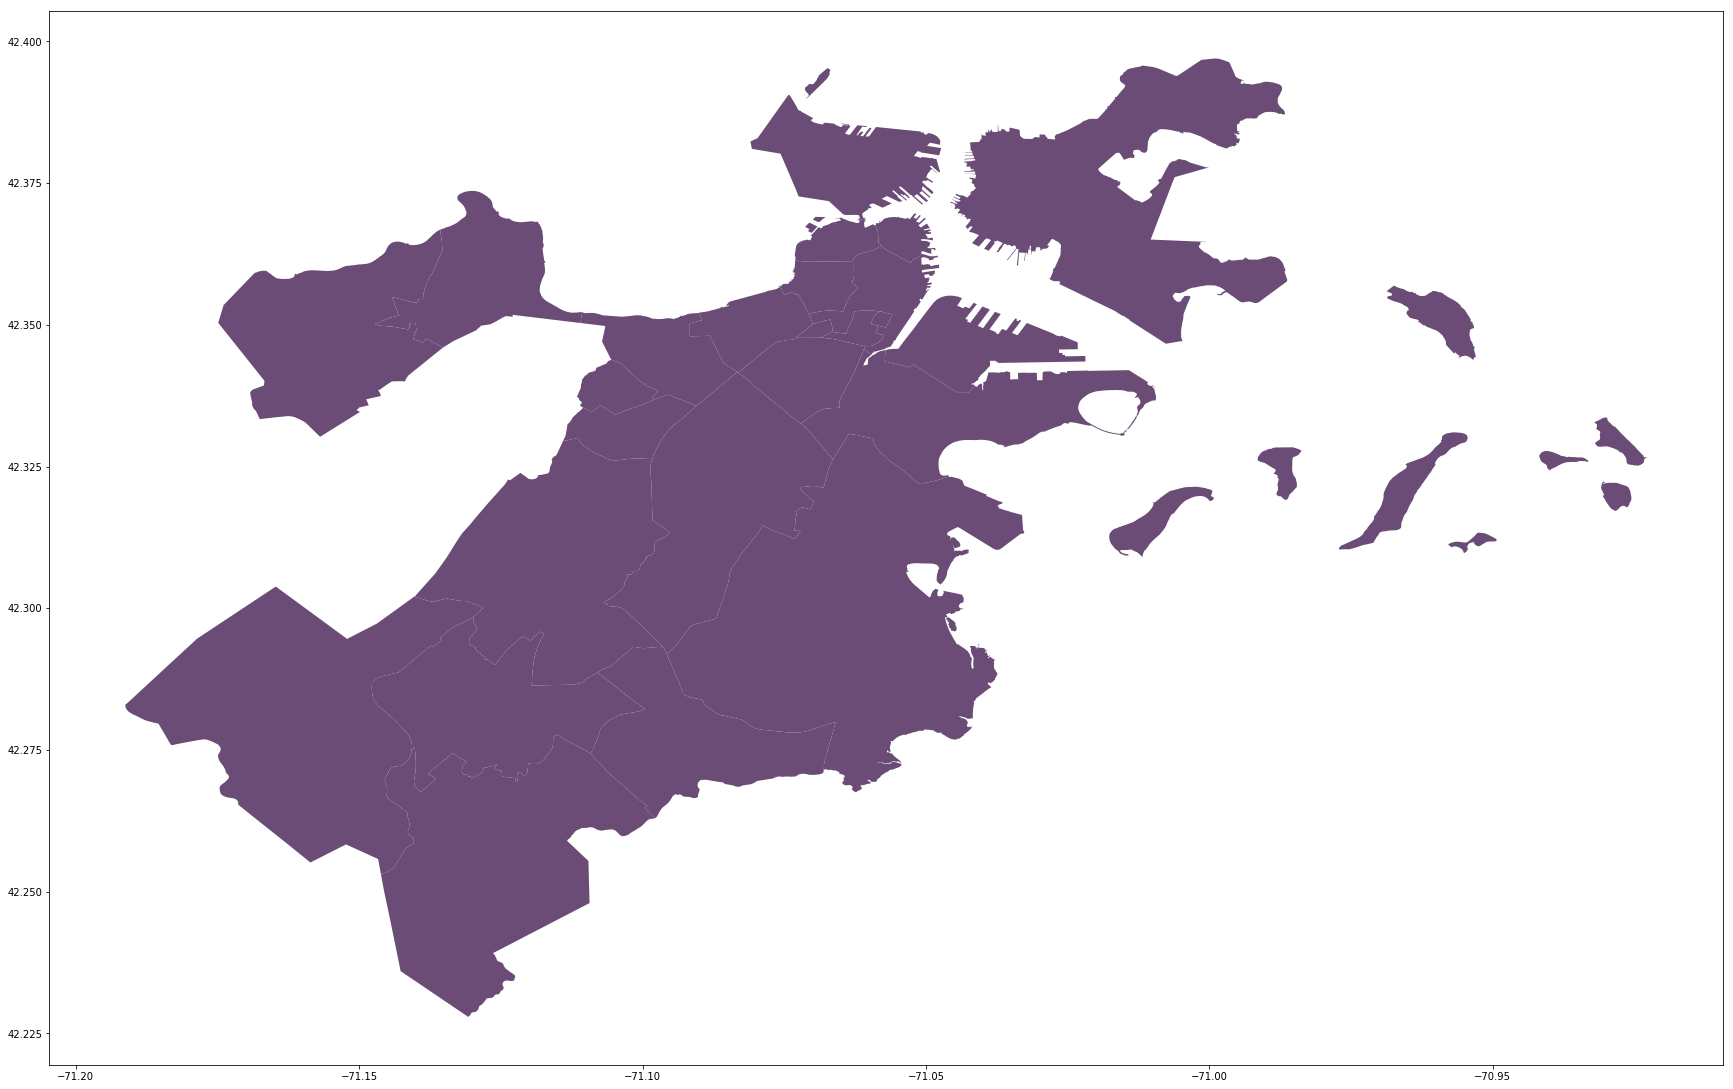

In [60]:
boston_map = geopandas.read_file('Boston_Neighborhoods.shp')
boston_map.plot(figsize=(30,20), color='#6A4C76')

(-71.20467319464721, -70.90935695961907, 42.219466456538655, 42.40543950480065)

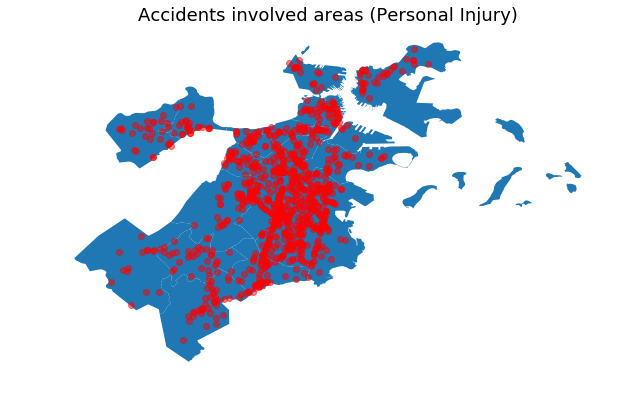

In [61]:
fig, ax = plt.subplots(1, figsize=(10,8))
base = boston_map.plot(ax=ax)
accident_geo_personal.plot(ax=base, color='red', alpha=0.5)
plt.title('Accidents involved areas (Personal Injury)', size=18)
plt.axis('off')

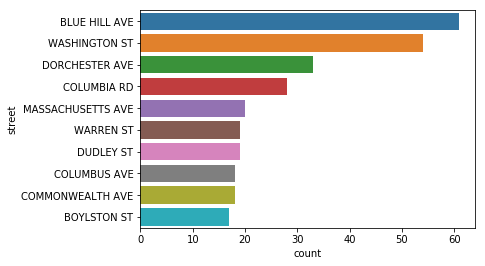

In [124]:
accident_street = map_accidents.loc[map_accidents['offense_description'] == 'M/V - LEAVING SCENE - PERSONAL INJURY']
sns.countplot(y='street', data = accident_street, order = accident_street['street'].value_counts().head(10).index)

### Accident - property damage

In [64]:
map_accidents_property_injury = data.loc[(data['offense_description'] == 'M/V - LEAVING SCENE - PROPERTY DAMAGE')]


/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


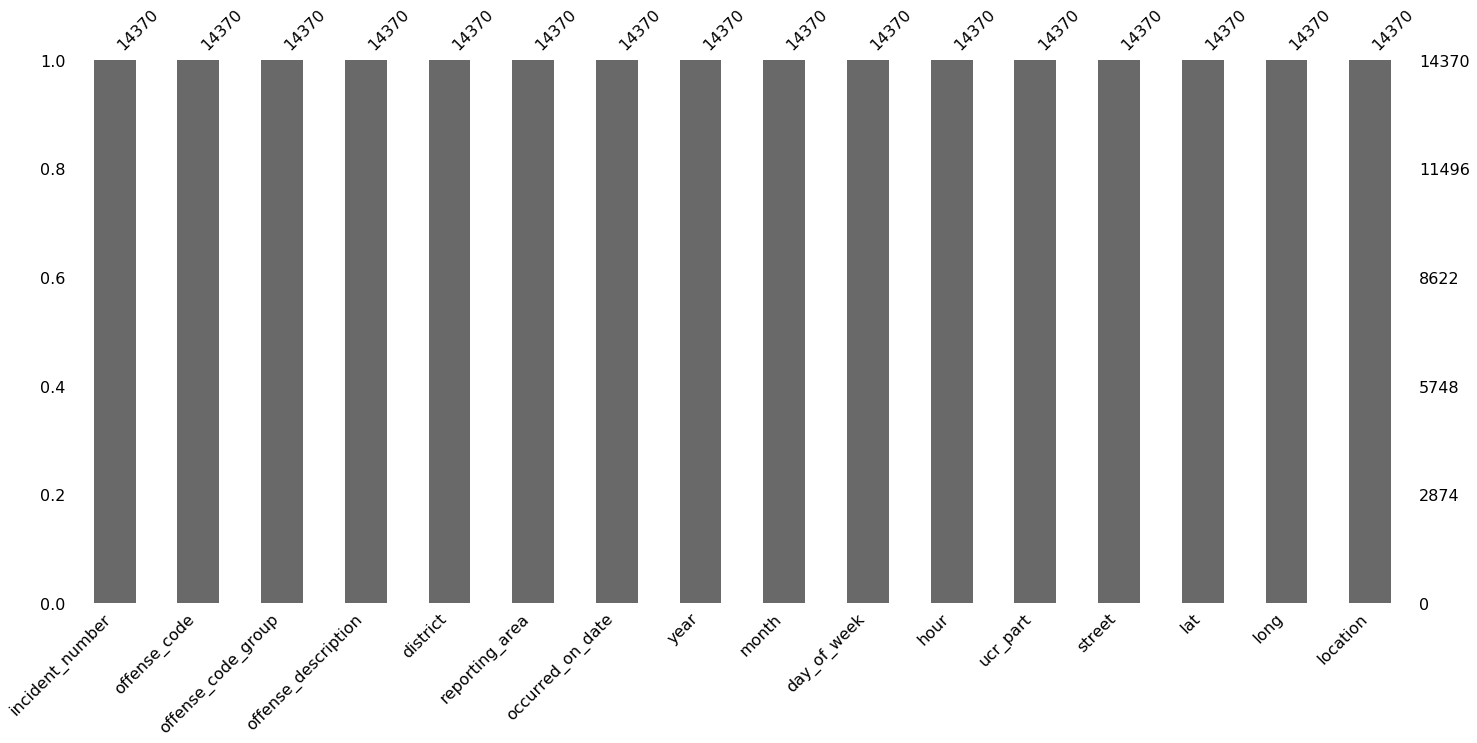

In [65]:
map_accidents_property_injury.drop('shooting', inplace=True, axis=1)
map_accidents_property_injury.dropna(inplace=True, axis=0)
msn.bar(map_accidents_property_injury)

In [66]:
map_accidents_property_injury['location'] = map_accidents_property_injury[['long', 'lat']].values.tolist()
map_accidents_property_injury['location'] = map_accidents_property_injury.location.apply(Point)
map_accidents_property_injury.head()

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
50,I182070877,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,E5,562,2018-09-03 15:00:00,2018,September,Monday,15,Part Three,WASHINGTON ST,42.287889,-71.126586,POINT (-71.12658585 42.28788933)
80,I182070843,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,A1,84,2018-09-03 14:23:00,2018,September,Monday,14,Part Three,HANOVER ST,42.363392,-71.054881,POINT (-71.05488123000001 42.36339154)
100,I182070826,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,462,2018-09-03 14:11:00,2018,September,Monday,14,Part Three,ROSSETER ST,42.303765,-71.074840,POINT (-71.07484027 42.30376511)
108,I182070817,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,D14,788,2018-08-31 12:00:00,2018,August,Friday,12,Part Three,SUTHERLAND RD,42.340234,-71.148006,POINT (-71.14800614000001 42.34023408)
115,I182070809,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,605,2018-09-03 12:37:00,2018,September,Monday,12,Part Three,FISHER AVE,42.330610,-71.108536,POINT (-71.10853621 42.33061023)


In [67]:
accident_geo_property = geopandas.GeoDataFrame(map_accidents_property_injury, geometry='location')
accident_geo_property.head(2)

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
50,I182070877,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,E5,562,2018-09-03 15:00:00,2018,September,Monday,15,Part Three,WASHINGTON ST,42.287889,-71.126586,POINT (-71.12658585 42.28788933)
80,I182070843,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,A1,84,2018-09-03 14:23:00,2018,September,Monday,14,Part Three,HANOVER ST,42.363392,-71.054881,POINT (-71.05488123000001 42.36339154)


In [ ]:
fig, ax = plt.subplots(1, figsize=(10,8))
base = boston_map.plot(ax=ax)
accident_geo_property.plot(ax=base, color='red', alpha=0.5)
plt.title('Accidents involved areas (Property Damage)', size=18)
plt.axis('off')

Text(0,0.5,'Streets')

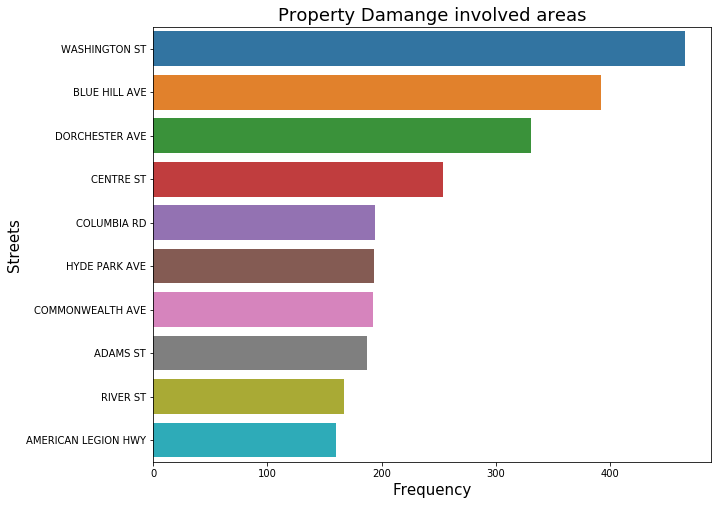

In [70]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='street', data = map_accidents_property_injury, order = map_accidents_property_injury['street'].value_counts().head(10).index, ax=ax)
plt.title('Property Damange involved areas', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Streets', fontsize=15)

## crimes related to Larceny

In [71]:
larceny_data = data.loc[data['offense_code_group'] == 'Larceny']
larceny_data.shape

(25935, 17)

In [72]:
larceny_df = larceny_data[['offense_description', 'street']]
larceny_df.reset_index(inplace=True)
larceny_df.drop('index', inplace=True, axis=1)
larceny_df

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,offense_description,street
0,LARCENY ALL OTHERS,LINCOLN ST
1,LARCENY SHOPLIFTING,SHAWMUT AVE
2,LARCENY ALL OTHERS,ELLINGTON ST
3,LARCENY THEFT FROM BUILDING,WINTER ST
4,LARCENY THEFT OF BICYCLE,CHESTNUT HILL AVE
5,LARCENY SHOPLIFTING,NEWBURY ST
6,LARCENY SHOPLIFTING,GALLIVAN BLVD
7,LARCENY SHOPLIFTING,HUNTINGTON AVE
8,LARCENY THEFT FROM BUILDING,RADCLIFFE RD
9,LARCENY SHOPLIFTING,HUNTINGTON AVE


In [73]:
larceny_df['offense_description'].value_counts()

LARCENY THEFT FROM BUILDING           9069
LARCENY SHOPLIFTING                   7949
LARCENY ALL OTHERS                    5963
LARCENY THEFT OF BICYCLE              2265
LARCENY PICK-POCKET                    455
LARCENY PURSE SNATCH - NO FORCE        188
LARCENY THEFT FROM COIN-OP MACHINE      16
LARCENY OTHER $200 & OVER                7
LARCENY IN A BUILDING $200 & OVER        5
LARCENY SHOPLIFTING UNDER $50            4
LARCENY SHOPLIFTING $200 & OVER          4
LARCENY BICYCLE $200 & OVER              3
LARCENY SHOPLIFTING $50 TO $199          2
LARCENY OTHER $50 TO $199                2
LARCENY IN A BUILDING UNDER $50          1
LARCENY OTHER UNDER $50                  1
LARCENY IN A BUILDING $50 TO $199        1
Name: offense_description, dtype: int64

In [176]:
larceny_df.loc[larceny_df['offense_description'] == 'LARCENY OTHER $200 & OVER']

,offense_description,street
25901,LARCENY OTHER $200 & OVER,MASSACHUSETTS AVE
25908,LARCENY OTHER $200 & OVER,HARRISON AVE
25913,LARCENY OTHER $200 & OVER,BOYLSTON ST
25917,LARCENY OTHER $200 & OVER,MASSACHUSETTS AVE
25923,LARCENY OTHER $200 & OVER,DIXWELL ST
25927,LARCENY OTHER $200 & OVER,COMMONWEALTH AVE
25933,LARCENY OTHER $200 & OVER,BOWDOIN ST


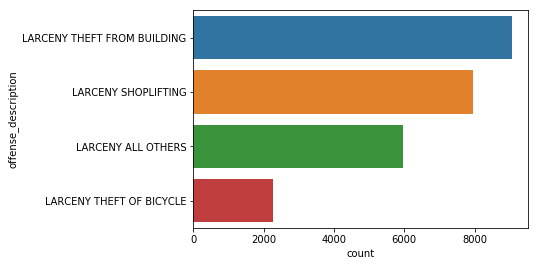

In [74]:
sns.countplot(y='offense_description', data=larceny_df, 
              order = larceny_df['offense_description'].value_counts().head(4).index)

### Map Larceny - Shoplifting

In [75]:
map_larceny_shoplifting = data[data['offense_description'] == 'LARCENY SHOPLIFTING']

In [76]:
#map_larceny_building.dropna(inplace=True, axis=0)
#msn.bar(map_larceny_building)
map_larceny_shoplifting.drop('shooting', inplace=True, axis=1)
map_larceny_shoplifting.dropna(inplace=True, axis=0)

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


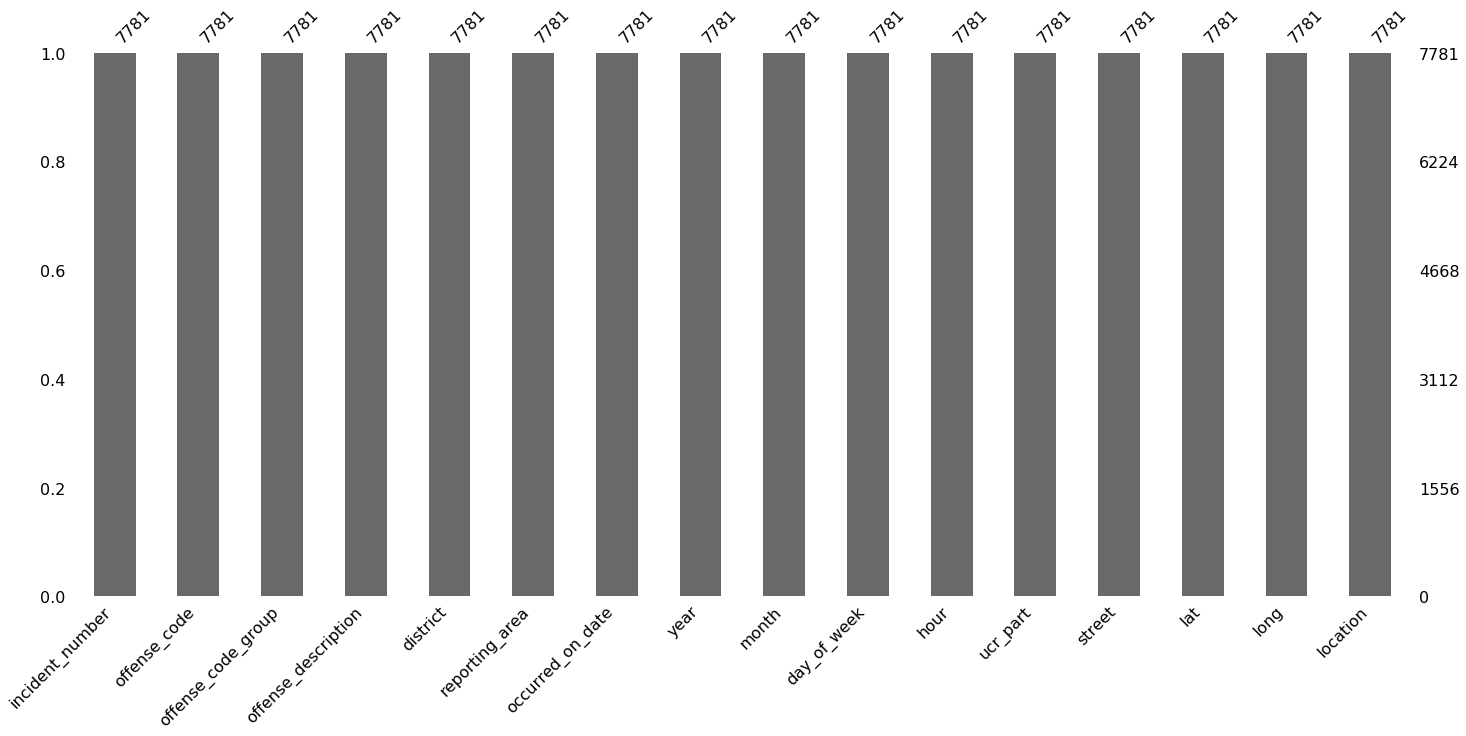

In [214]:
msn.bar(map_larceny_building)

In [77]:
map_larceny_shoplifting['location'] = map_larceny_shoplifting[['long', 'lat']].values.tolist()
map_larceny_shoplifting['location'] = map_larceny_shoplifting.location.apply(Point)

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
larceny_geo = geopandas.GeoDataFrame(map_larceny_shoplifting, geometry = 'location')

(-71.20467319464721, -70.90935695961907, 42.219466456538655, 42.40543950480065)

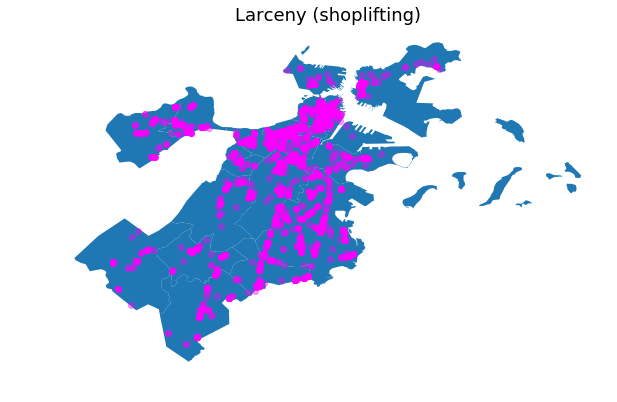

In [79]:
fig, ax = plt.subplots(1, figsize=(10,8))
base = boston_map.plot(ax=ax)
larceny_geo.plot(ax=base, color='fuchsia', alpha=0.4)
plt.title('Larceny (shoplifting)', size=18)
plt.axis('off')

In [ ]:
accident_street

Text(0,0.5,'Streets')

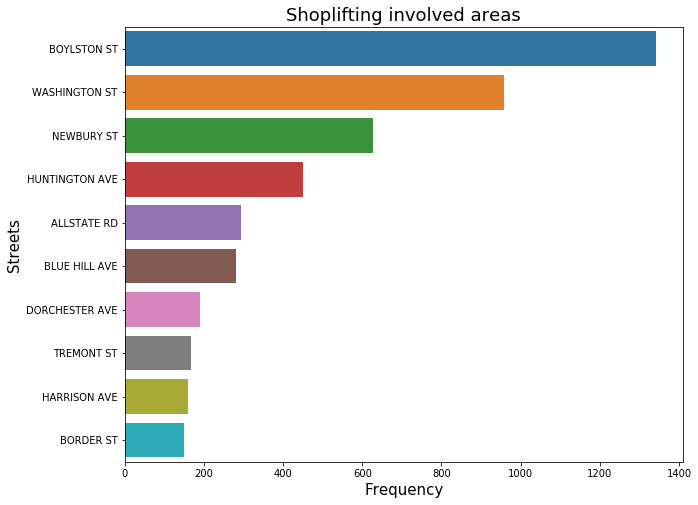

In [80]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='street', data = map_larceny_shoplifting, order = map_larceny_shoplifting['street'].value_counts().head(10).index, ax=ax)
plt.title('Shoplifting involved areas', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Streets', fontsize=15)

## Larceny - Theft from building

In [81]:
map_larceny_theft = data[data['offense_description'] == 'LARCENY THEFT FROM BUILDING']

In [82]:
map_larceny_theft.drop('shooting', inplace=True, axis=1)
map_larceny_theft.dropna(inplace=True, axis=0)
#msn.bar(map_larceny_theft)

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [278]:
map_larceny_theft = map_larceny_theft[:9000]

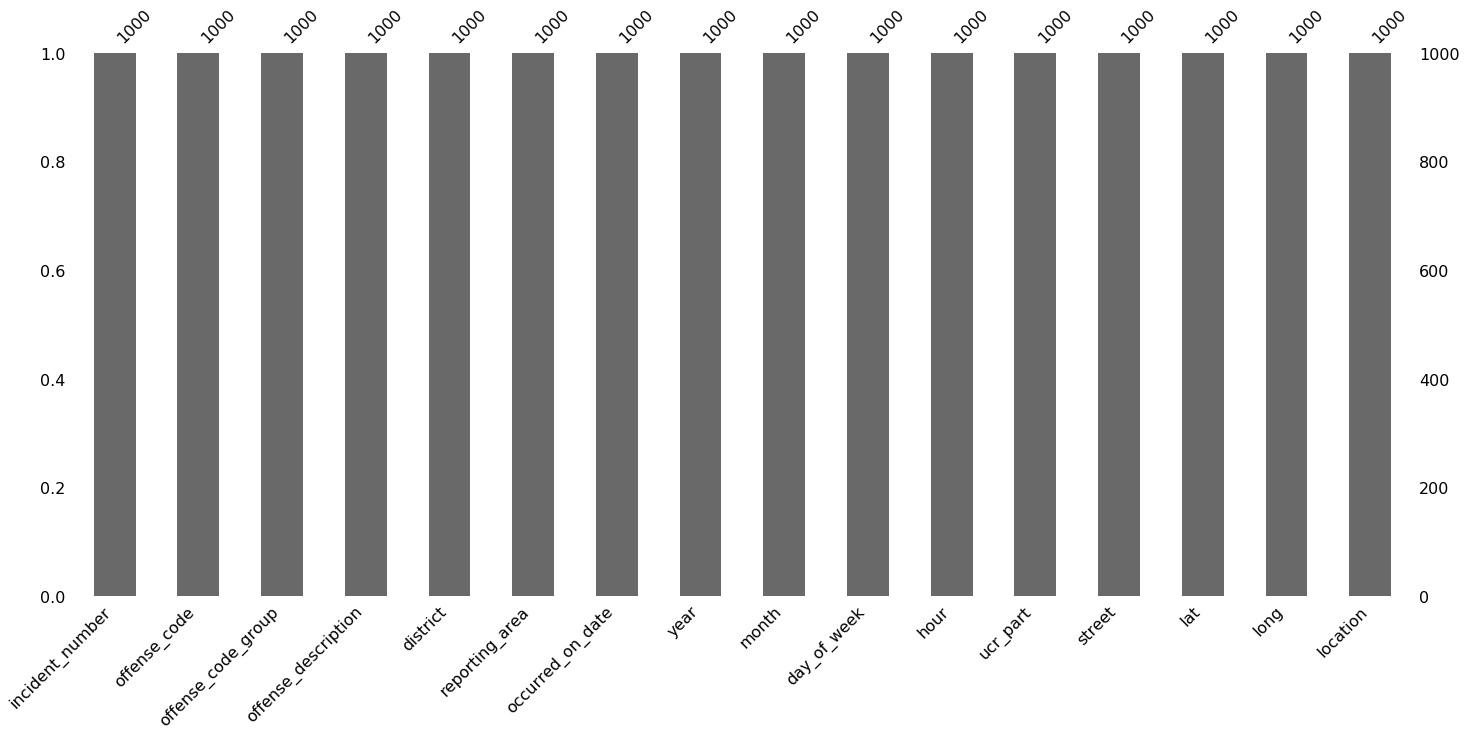

In [231]:
msn.bar(map_larceny_theft)

In [83]:
map_larceny_theft['location'] = map_larceny_theft[['long', 'lat']].values.tolist()
map_larceny_theft['location'] = map_larceny_theft.location.apply(Point)

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
larceny_geo_theft = geopandas.GeoDataFrame(map_larceny_theft, geometry='location')

(-71.20467319464721, -70.90935695961907, 42.219466456538655, 42.40543950480065)

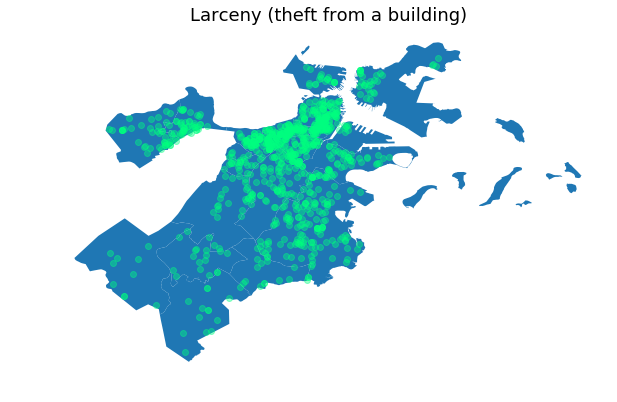

In [281]:
fig, ax = plt.subplots(figsize=(10,8))
base = boston_map.plot(ax=ax)
larceny_geo_theft.plot(ax=base, color='springgreen', alpha=0.4)
plt.title('Larceny (theft from a building)', size=18)
plt.axis('off')

Text(0,0.5,'Streets')

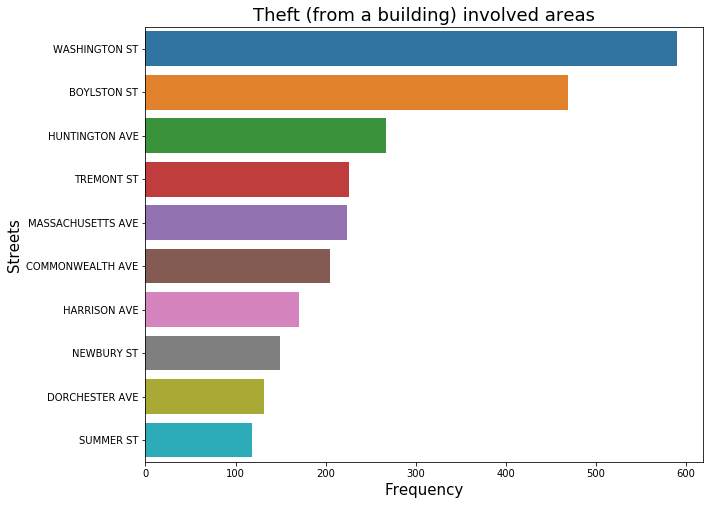

In [85]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='street', data = map_larceny_theft, order = map_larceny_theft['street'].value_counts().head(10).index, ax=ax)
plt.title('Theft (from a building) involved areas', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Streets', fontsize=15)

### Lets investigate Medical Assitance related crimes

In [86]:
medical_data = data[data['offense_code_group'] == 'Medical Assistance']

In [31]:
medical_data.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
15,I182070920,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 19:43:00,2018,September,Monday,19,Part Three,NaN,42.352875,-71.073830,"(42.35287456, -71.07382970)"
20,I182070913,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,NaN,,NaN,2018-09-03 18:46:00,2018,September,Monday,18,Part Three,WOLCOTT,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"
22,I182070910,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,B3,434,NaN,2018-09-03 18:42:00,2018,September,Monday,18,Part Three,CAPEN ST,42.283402,-71.080797,"(42.28340243, -71.08079740)"
26,I182070905,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,172,NaN,2018-09-03 18:50:00,2018,September,Monday,18,Part Three,MASSACHUSETTS AVE,42.333112,-71.072764,"(42.33311189, -71.07276370)"
48,I182070880,3018,Medical Assistance,SICK/INJURED/MEDICAL - POLICE,A1,116,NaN,2018-09-03 17:09:00,2018,September,Monday,17,Part Three,BEACH ST,42.351084,-71.059395,"(42.35108400, -71.05939500)"


In [87]:
med_crimes = medical_data[['offense_description', 'street']]
med_crimes.head()

,offense_description,street
15,SICK/INJURED/MEDICAL - PERSON,NaN
20,SICK/INJURED/MEDICAL - PERSON,WOLCOTT
22,SICK/INJURED/MEDICAL - PERSON,CAPEN ST
26,SICK/INJURED/MEDICAL - PERSON,MASSACHUSETTS AVE
48,SICK/INJURED/MEDICAL - POLICE,BEACH ST


In [299]:
#med_crimes.reset_index(inplace=True)
#med_crimes.drop('index', inplace=True, axis=1)
med_crimes.head()

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,offense_description,street
0,SICK/INJURED/MEDICAL - PERSON,NaN
1,SICK/INJURED/MEDICAL - PERSON,WOLCOTT
2,SICK/INJURED/MEDICAL - PERSON,CAPEN ST
3,SICK/INJURED/MEDICAL - PERSON,MASSACHUSETTS AVE
4,SICK/INJURED/MEDICAL - POLICE,BEACH ST


In [88]:
med_frame = med_crimes['offense_description'].to_frame()

In [89]:
med_list_new = []
def parse_med(data):    
    for value in data:
        first_med_split = value.split('-')
        if len(first_med_split) > 1:
            #print("hhh"+str(first_med_split))
            med_list_new.append(first_med_split[1].strip())
        else:
            med_list_new.append(first_med_split[0].strip())
    
med_frame.apply(parse_med)


offense_description    None
dtype: object

In [90]:
med_frame = pd.DataFrame({'offense_description':med_list_new})

In [91]:
med_crimes['offense_description'] = med_frame['offense_description']

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [304]:
med_crimes.head()

,offense_description,street
0,PERSON,NaN
1,PERSON,WOLCOTT
2,PERSON,CAPEN ST
3,PERSON,MASSACHUSETTS AVE
4,POLICE,BEACH ST


In [92]:
med_crimes['offense_description'].value_counts()

PERSON                            1494
POLICE                             124
SUDDEN DEATH                       104
DEATH INVESTIGATION                 91
DOG BITES                           27
SUICIDE / SUICIDE ATTEMPT           25
INJURY BICYCLE NO M/V INVOLVED       4
Name: offense_description, dtype: int64

Text(0,0.5,'Crimes')

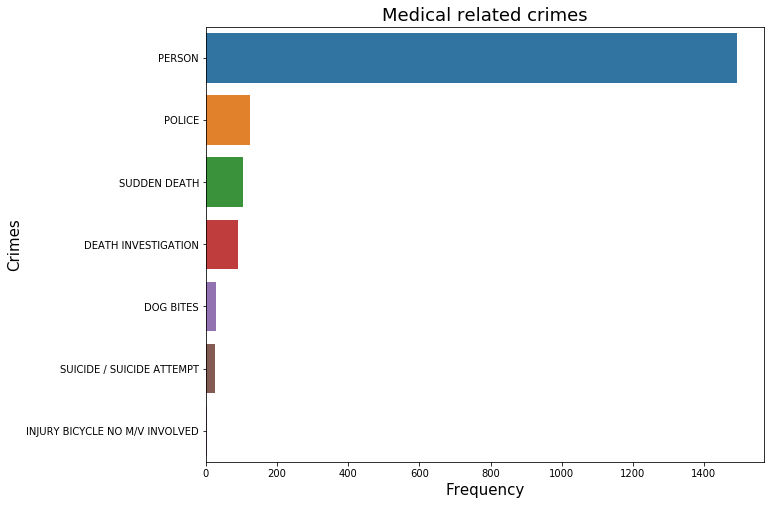

In [93]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='offense_description', data = med_crimes, order = med_crimes['offense_description'].value_counts().head(10).index, ax=ax)
plt.title('Medical related crimes', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Crimes', fontsize=15)

### Map Medical related crimes

In [94]:
data.loc[data['offense_description'].str.contains('PERSON')]['offense_description'].unique()

array(['SICK/INJURED/MEDICAL - PERSON', 'M/V ACCIDENT - PERSONAL INJURY',
       'MISSING PERSON', 'INVESTIGATE PERSON',
       'M/V - LEAVING SCENE - PERSONAL INJURY',
       'MISSING PERSON - LOCATED', 'FRAUD - IMPERSONATION',
       'MISSING PERSON - NOT REPORTED - LOCATED', 'DISORDERLY PERSON'],
      dtype=object)

In [95]:
medical_person = data[(data['offense_description'] == 'SICK/INJURED/MEDICAL - PERSON')]
medical_person['offense_description'].head()

15    SICK/INJURED/MEDICAL - PERSON
20    SICK/INJURED/MEDICAL - PERSON
22    SICK/INJURED/MEDICAL - PERSON
26    SICK/INJURED/MEDICAL - PERSON
65    SICK/INJURED/MEDICAL - PERSON
Name: offense_description, dtype: object

In [96]:
medical_person.drop('shooting', inplace=True, axis=1)
medical_person.dropna(inplace=True, axis=0)

/home/abhiram/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [356]:
medical_person = medical_person[:20000]

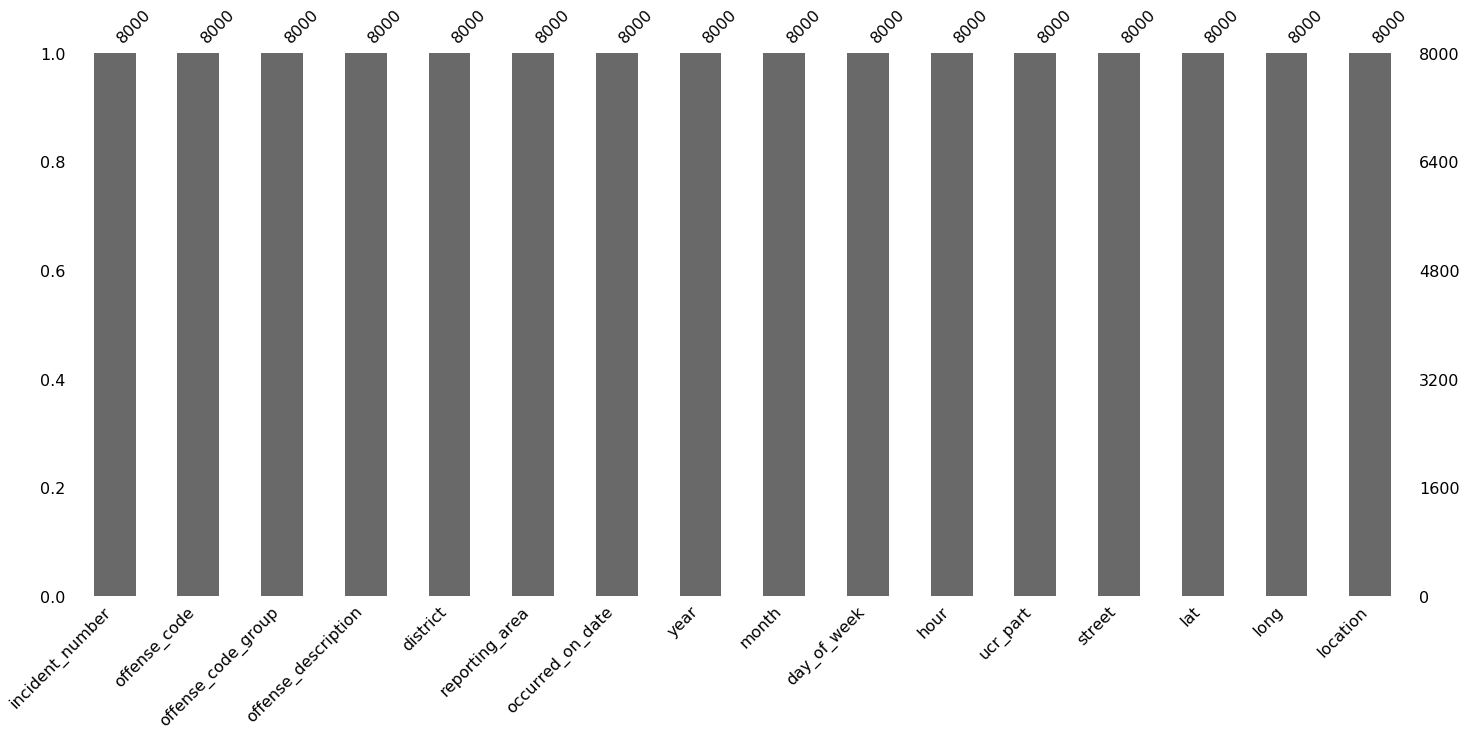

In [335]:
msn.bar(medical_person)

In [97]:
medical_person['location'] = medical_person[['long', 'lat']].values.tolist()
medical_person['location'] = medical_person.location.apply(Point)

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [358]:
medical_geo_map = geopandas.GeoDataFrame(medical_person, geometry='location')

(-71.20467319464721, -70.90935695961907, 42.219466456538655, 42.40543950480065)

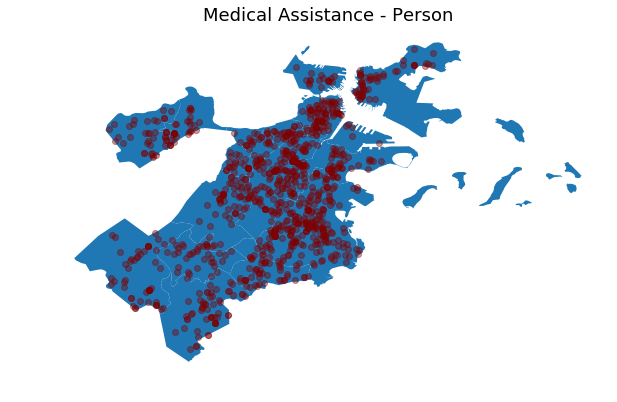

In [364]:
fig, ax = plt.subplots(figsize=(10,8))
base = boston_map.plot(ax=ax)
medical_geo_map.plot(ax=base, color='maroon', alpha=0.4)
plt.title('Medical Assistance - Person', size=18)
plt.axis('off')

Text(0,0.5,'Streets')

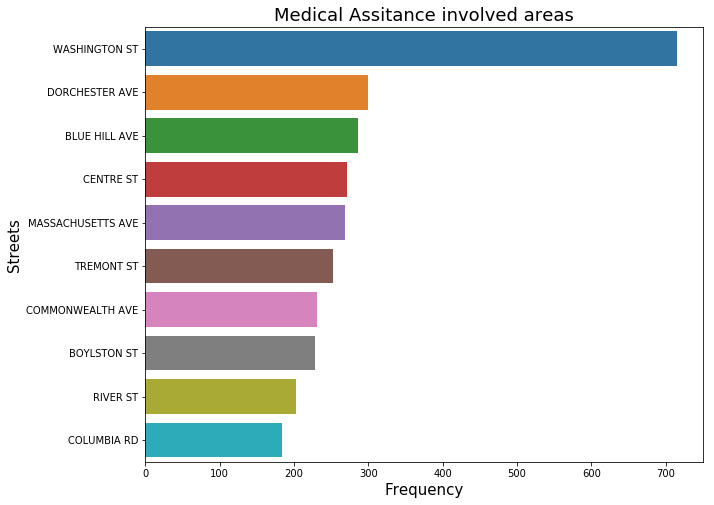

In [98]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='street', data = medical_person, order = medical_person['street'].value_counts().head(10).index, ax=ax)
plt.title('Medical Assitance involved areas', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Streets', fontsize=15)

In [391]:
data_shooting = data[data['shooting'].notnull()]


In [392]:
data_shooting.groupby('year')['shooting'].count().to_frame()

,shooting
year,
2015,185
2016,279
2017,370
2018,185


### Shooting related incidents

In [389]:
shooting_group_year = data.groupby('year')['shooting'].count().to_frame()
#a = a.reset_index()
shooting_group_year

,shooting
year,
2015,185
2016,279
2017,370
2018,185


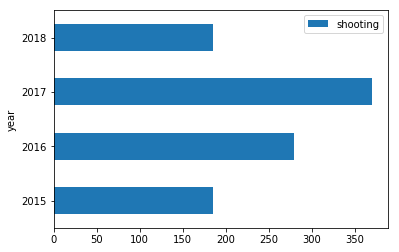

In [368]:
shooting_group_year.plot.barh()

In [387]:
data_shooting = data[data['shooting'].notnull()]
data_shooting.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
1295,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,August,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1860,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,August,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
3259,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,August,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3260,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,August,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
4107,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,August,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"


### As we can see there were more than 350 shooting involved incidents in 2017. Let's see what type of offences were involved in a shooting.

In [394]:
shooting_involved_2017 = data[data['year']==2017].groupby('offense_code_group')['shooting'].count().sort_values(ascending=False).head(20).to_frame()
shooting_involved_2017 = shooting_involved_2017.reset_index()

In [404]:
year_2017 = data.loc[data['year'] == 2017]
year_2017_shooting = year_2017.loc[year_2017['shooting'] == 'Y']
year_2017_shooting

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
66499,I172107441,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,237,Y,2017-12-30 19:31:00,2017,December,Saturday,19,Part One,ELDER ST,42.320597,-71.064901,"(42.32059748, -71.06490117)"
66880,I172107017,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,507,Y,2017-12-28 23:25:00,2017,December,Thursday,23,Part One,FLORIAN ST,42.287327,-71.117691,"(42.28732723, -71.11769065)"
67672,I172106158,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,246,Y,2017-12-25 01:11:00,2017,December,Monday,1,Part One,BELFORT ST,42.315094,-71.054942,"(42.31509363, -71.05494154)"
67699,I172106125,1402,Vandalism,VANDALISM,B3,466,Y,2017-12-24 05:30:00,2017,December,Sunday,5,Part Two,WELLINGTON HILL ST,42.284856,-71.093658,"(42.28485608, -71.09365750)"
67700,I172106125,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B3,466,Y,2017-12-24 05:30:00,2017,December,Sunday,5,Part One,WELLINGTON HILL ST,42.284856,-71.093658,"(42.28485608, -71.09365750)"
67722,I172106098,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,911,Y,2017-12-24 19:29:00,2017,December,Sunday,19,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
67864,I172105931,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C6,216,Y,2017-12-23 22:44:00,2017,December,Saturday,22,Part One,W SEVENTH ST,42.335742,-71.053091,"(42.33574249, -71.05309125)"
67897,I172105897,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,542,Y,2017-12-23 19:30:00,2017,December,Saturday,19,Part One,RESERVATION RD,42.252202,-71.130951,"(42.25220188, -71.13095053)"
68028,I172105745,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,385,Y,2017-12-23 03:13:00,2017,December,Saturday,3,Part One,HILL TOP ST,42.279054,-71.053378,"(42.27905426, -71.05337772)"
68029,I172105745,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",C11,385,Y,2017-12-23 03:13:00,2017,December,Saturday,3,Part One,HILL TOP ST,42.279054,-71.053378,"(42.27905426, -71.05337772)"


Text(0.5,0,'frequency')

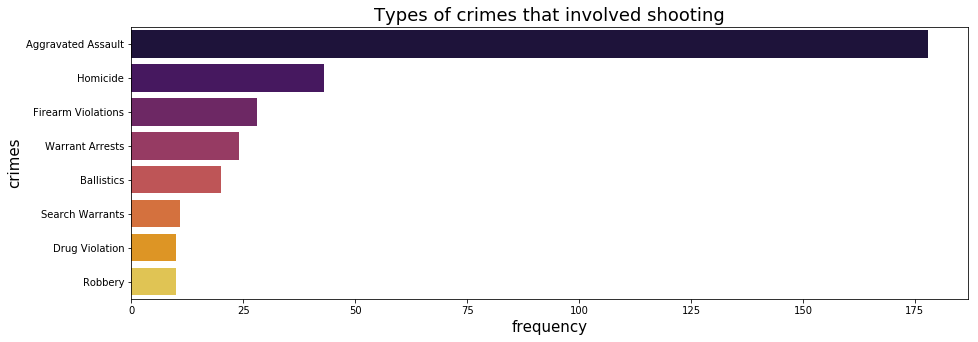

In [448]:
fig, ax = plt.subplots(figsize=(15, 5))
#year_2017_shooting.plot(kind='bar', ax=ax)
sns.countplot(y='offense_code_group', data=year_2017_shooting, palette='inferno', 
              order = year_2017_shooting['offense_code_group'].value_counts().head(8).index ,ax=ax)
plt.title('Types of crimes that involved shooting', size=18)
plt.ylabel('crimes', size=15)
plt.xlabel('frequency', size=15)

### Map shooting related incidents

In [424]:
map_shooting = data_shooting.copy()

In [425]:
map_shooting['location'] = map_shooting[['long', 'lat']].values.tolist()
map_shooting['location'] = map_shooting.location.apply(Point)

In [428]:
map_shooting.dropna(inplace=True, axis=0)

shooting_geo = geopandas.GeoDataFrame(map_shooting, geometry='location')

(-71.20467319464721, -70.90935695961907, 42.219466456538655, 42.40543950480065)

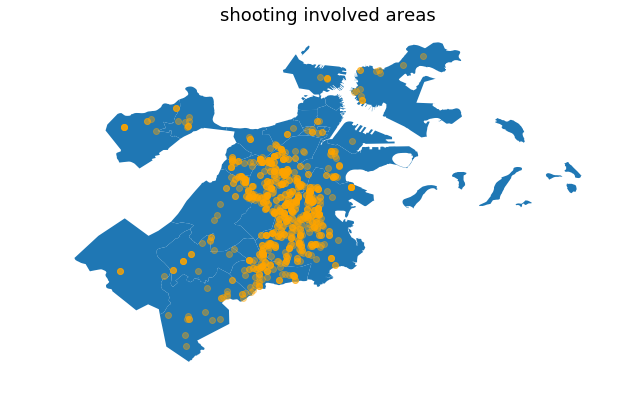

In [431]:
fig, ax = plt.subplots(figsize=(10,8))
base = boston_map.plot(ax=ax)
shooting_geo.plot(ax=base, color='orange', alpha=0.4)
plt.title('shooting involved areas', size=18)
plt.axis('off')

Text(0,0.5,'Streets')

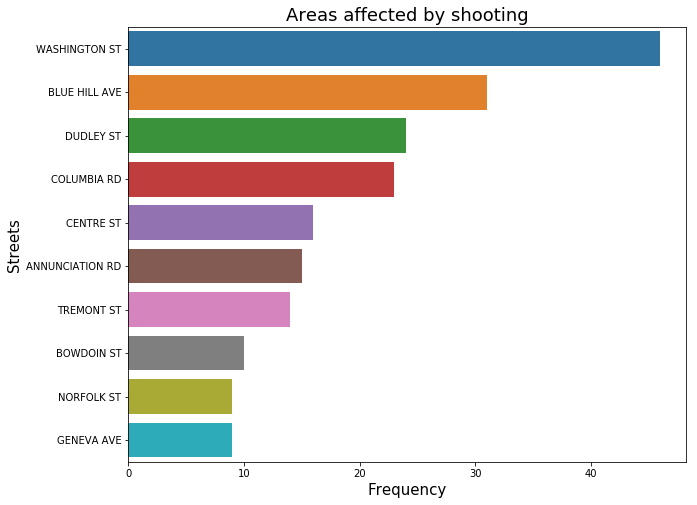

In [451]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='street', data = map_shooting, order = map_shooting['street'].value_counts().head(10).index, ax=ax)
plt.title('Areas affected by shooting', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Streets', fontsize=15)

In [433]:
aggrevated_assault = data_shooting.loc[data_shooting['offense_code_group'] == 'Aggravated Assault']

In [434]:
aggrevated_assault['location'] = aggrevated_assault[['long', 'lat']].values.tolist()
aggrevated_assault['location'] = aggrevated_assault.location.apply(Point)

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [435]:
aggrevated_assault.dropna(inplace=True, axis=0)

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [436]:
assault_geo = geopandas.GeoDataFrame(aggrevated_assault, geometry='location')

(-71.20467319464721, -70.90935695961907, 42.219466456538655, 42.40543950480065)

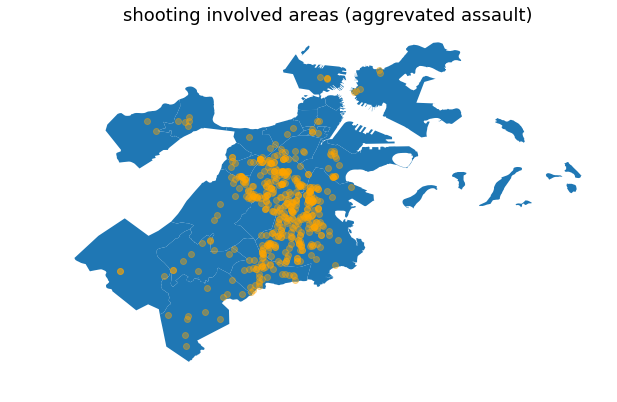

In [438]:
fig, ax = plt.subplots(figsize=(10,8))
base = boston_map.plot(ax=ax)
assault_geo.plot(ax=base, color='orange', alpha=0.4)
plt.title('shooting involved areas (aggrevated assault)', size=18)
plt.axis('off')

Text(0,0.5,'Streets')

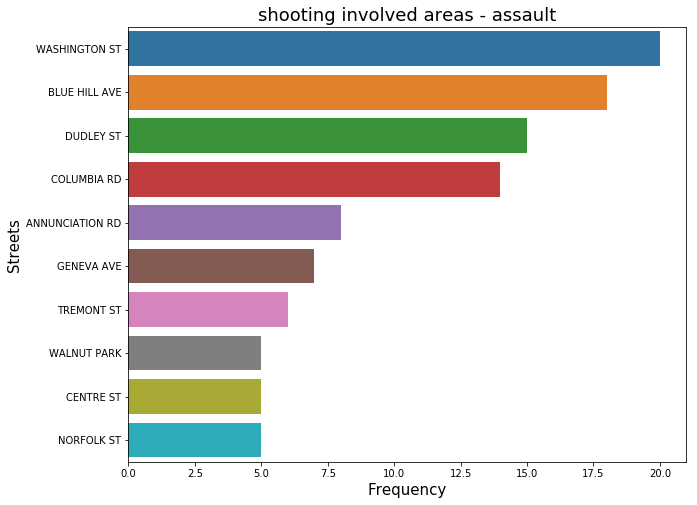

In [452]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='street', data = aggrevated_assault, order = aggrevated_assault['street'].value_counts().head(10).index, ax=ax)
plt.title('shooting involved areas - assault', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Streets', fontsize=15)

In [440]:
homicide = data_shooting.loc[data_shooting['offense_code_group'] == 'Homicide']

In [441]:
homicide['location'] = homicide[['long', 'lat']].values.tolist()
homicide['location'] = homicide.location.apply(Point)

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [442]:
homicide.dropna(inplace=True, axis=0)

/home/abhiram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [443]:
homicide_geo = geopandas.GeoDataFrame(homicide, geometry='location')

(-71.20467319464721, -70.90935695961907, 42.219466456538655, 42.40543950480065)

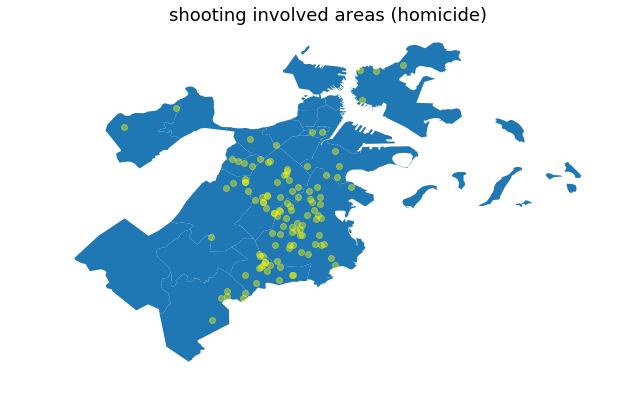

In [449]:
fig, ax = plt.subplots(figsize=(10,8))
base = boston_map.plot(ax=ax)
homicide_geo.plot(ax=base, color='yellow', alpha=0.4)
plt.title('shooting involved areas (homicide)', size=18)
plt.axis('off')

Text(0,0.5,'Streets')

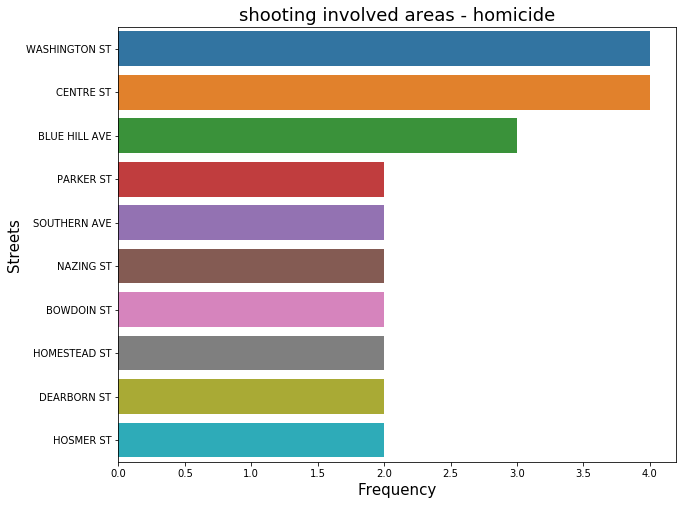

In [453]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.countplot(y='street', data = homicide, order = homicide['street'].value_counts().head(10).index, ax=ax)
plt.title('shooting involved areas - homicide', size=18)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Streets', fontsize=15)